<h1>Project Overview</h1>

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistens as possible. Using what you've learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in mojor metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and mojor/minor category from Jan 2008-Dec 2016.

This dataset contains:
1. lsoa_code: this represents a policing area
2. borough: the lonodn borough for which the statistic is related
3. major_category: the moajor crime category
4. minor_category: the minor crime category
5. value: the count of the crime for that particular borough, in that particular month
6. year: the year of the summary statistic
7. month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. Yout have to demonstrate that you're able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

1. What is the change in the number of crime incidents from 2011 to 2016?
2. what were the top 3 crimes per borough in 2016?

<h1>Import Library</h1>

In [14]:
# untuk pemrosesan data
import pandas as pd
import numpy as np

#membuat peta
import folium

# Untuk keperluan plotting
import seaborn as sns
import matplotlib.pyplot as plt

# untuk membuat wordcloud
from wordcloud import WordCloud

<h1>Dataset</h1>

<h2>Deskripsi Dataset</h2>
<hr>

Dataset yang digunakan adalah data kejahatan di wilayah metropolitan utama, seperti kota London yang terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, serta kategori Mayor dan Minor dari Januari 2008 sampai Desember 2016. Data ini terdiri dari 13.490.604 baris data dengan 7 kolom yang berisi:

1. lsoa_code = kode area polisi
2. borough = wilayah kota London yang terkait dengan data statistik
3. major_category = kategori kejahatan mayor
4. minor_category = kategori kejahatan minor
5. value = jumlah kejahatan yang terjadi di wilayah (borough) tertentu pada bulan tertentu
6. year = ringkasan tahun kejadian
7. month = ringkasan bulan kejadian

In [15]:
# read dataset
df = pd.read_csv('/Users/agilh/Downloads/london_crime_by_lsoa.csv')

# menampilkan dataset
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


<h2>Melihat Informasi Dataset</h2>

In [16]:
# melihat informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


<h1>Preprocessing</h1>

In [17]:
# menampilkan 20 data teratas pada dataset
df.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


<h2>Mengetahui Apakah ada Missing Value pada Data</h2>

In [18]:
# menghitung jumlah missing values pada kolom yang disediakan oleh dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Setelah kodingan dijalankan terlihat bahwa tidak ada missing values pada dataset. Dataset dapat langsung digunakan

<h1>Area Plot</h1>

Apa 5 kejahatan major_category teratas yang terjadi dalam kurun waktu 2008-2016?

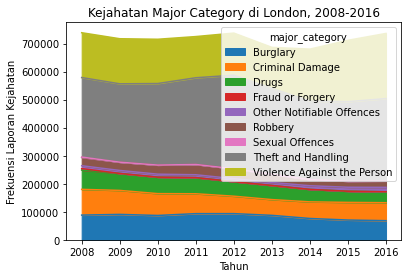

In [19]:
# Melakukan grouping dan menghitung total laporan kejahatan
df_grouped = df.groupby(['major_category', 'year']).agg({'value': 'sum'}).reset_index()

# Melakukan pivoting untuk memudahkan visualisasi data
df_pivoted = df_grouped.pivot(index='year', columns='major_category', values='value')

# Membuat visualisasi area
ax = df_pivoted.plot(kind='area')

# Menambahkan judul visualisasi, label sumbu x, dan label sumbu y
ax.set_title('Kejahatan Major Category di London, 2008-2016')
ax.set_xlabel('Tahun')
ax.set_ylabel('Frekuensi Laporan Kejahatan')

# Menampilkan visualisasi
plt.show()

<h2>Analisis</h2>

Dari visualisasi diatas, 5 kejahatan teratas major_category yang terjadi dalam kurun waktu 2008-2016 yaitu:

1. Violence Against the Person
2. Theft and Handling
3. Sexual Offences
4. Robbery
5. Other Notifiable Offences

<h1>Histogram</h1>

Bagaimana frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun? 

<Figure size 720x432 with 0 Axes>

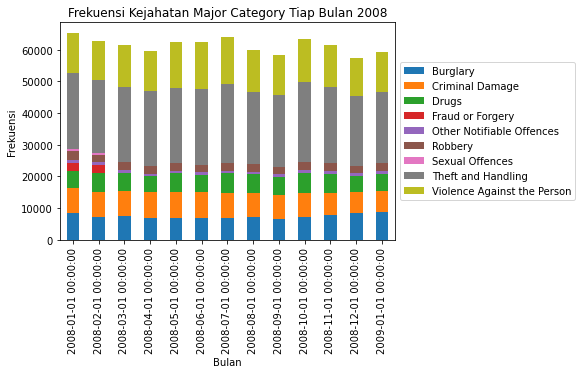

<Figure size 720x432 with 0 Axes>

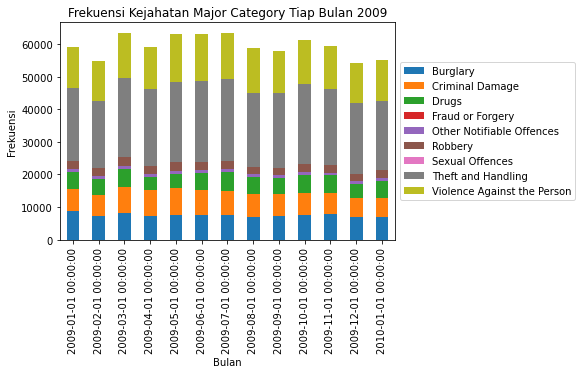

<Figure size 720x432 with 0 Axes>

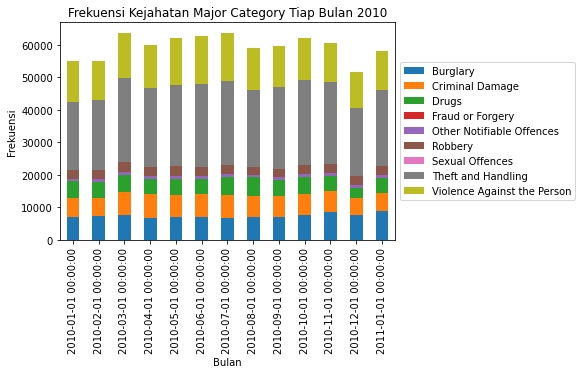

<Figure size 720x432 with 0 Axes>

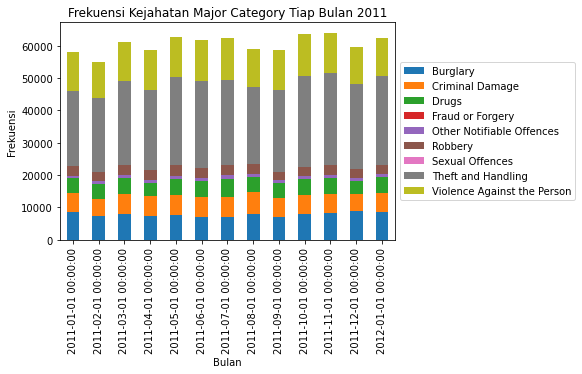

<Figure size 720x432 with 0 Axes>

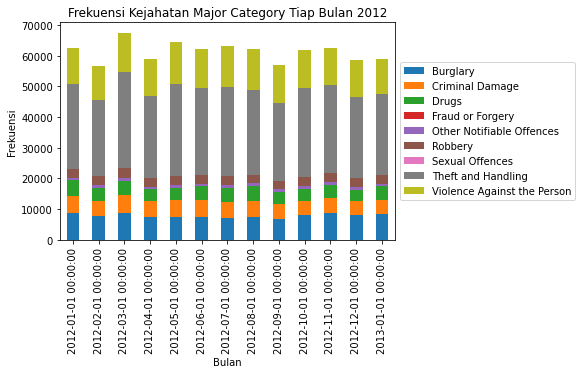

<Figure size 720x432 with 0 Axes>

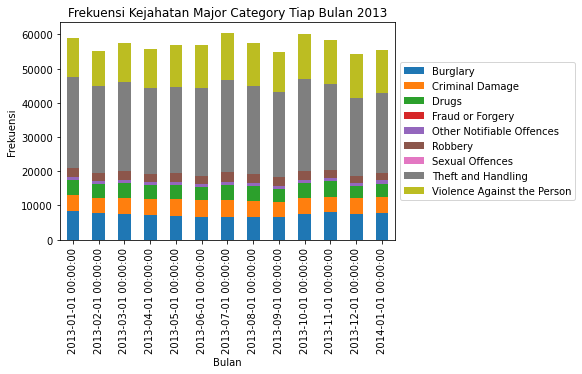

<Figure size 720x432 with 0 Axes>

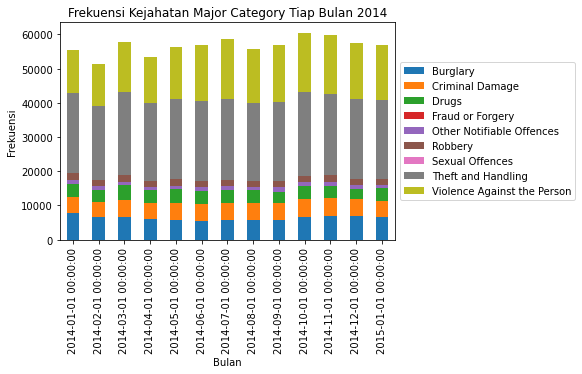

<Figure size 720x432 with 0 Axes>

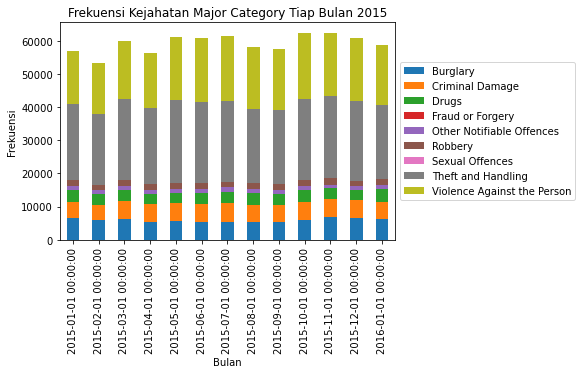

<Figure size 720x432 with 0 Axes>

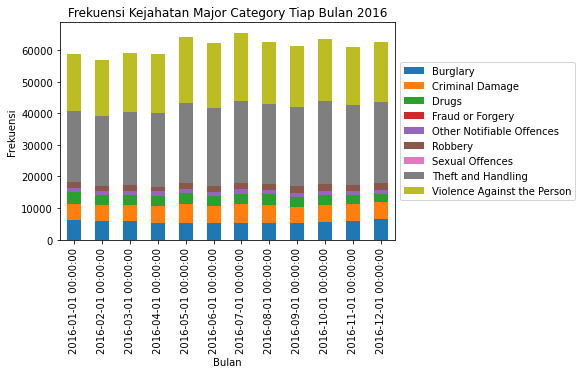

In [20]:
# Mengubah kolom year dan month menjadi kolom datetime year_month
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str), format='%Y-%m')

# Melakukan grouping dan menghitung total laporan kejahatan
grouped_data = df.groupby(['year_month', 'major_category']).sum()

# Melakukan pivoting untuk memudahkan visualisasi data
wide_data = grouped_data['value'].unstack()

# Membuat visualisasi stacked bar untuk setiap tahun
for year in range(2008, 2017):
    plt.figure(figsize=(10,6))
    start_date = pd.Timestamp(str(year))
    end_date = pd.Timestamp(str(year+1))
    data = wide_data.loc[start_date:end_date, :]
    data.plot(kind='bar', stacked=True)
    plt.title(f"Frekuensi Kejahatan Major Category Tiap Bulan {year}")
    plt.xlabel('Bulan')
    plt.ylabel('Frekuensi')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

<h2>Analisis</h2>

Dari hasil visualisasi di atas, frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun sedikit demi sedikit mengalami penurunan yang berkelanjutan kecuali untuk kejahatan major_kategory violence Against the Person yang mengalami pasang surut degan kenaikkan di tahun 2012 kemudian turun lalu naik kembali di tahun 2014 secara konstan ke tahun berikutnya dan juga kejahatan major_kategory Theft and Handling yang naik di tahun yang sama 2012 walaupun pada tahun berikutnya dia mengalami penurunan yang konstan

<h1>Bar Chart</h1>

5 Kejahatan minor tertinggi apakah yang ada di kota London dalam kurun waktu 2008-2016?

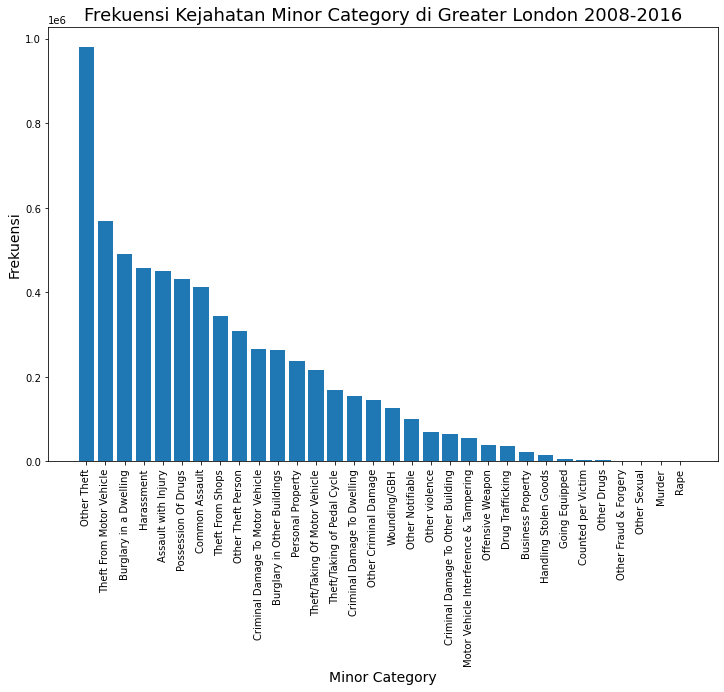

In [21]:
# Mengelompokkan data berdasarkan minor_category dan menjumlahkan nilai kolom 'value'
grouped_data = df.groupby('minor_category')['value'].sum()

# Mengurutkan data berdasarkan jumlah frekuensi secara menurun
grouped_data = grouped_data.sort_values(ascending=False)

# Membuat visualisasi bar dan menggunakan data dari grouped_data
plt.figure(figsize=(12,8))
plt.bar(grouped_data.index, grouped_data.values)

# Menambahkan judul, label sumbu dan keterangan sumbu
plt.title('Frekuensi Kejahatan Minor Category di Greater London 2008-2016', fontsize=18)
plt.xlabel('Minor Category', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90)
plt.show()

<h2>Analisis</h2>

Dari visualisasi diatas, 5 Kejahatan minor tertinggi yang ada di kota London dalam kurun waktu 2008-2016:

1. Other Theft
2. Theft From Motor Vehicle
3. Burglary in a Dwelling
4. Harrassement
5. Assault with Injury

<h1>Pie Chart</h1>

Bagaimana persentase kejahatan major category tertinggi yang terjadi di London?

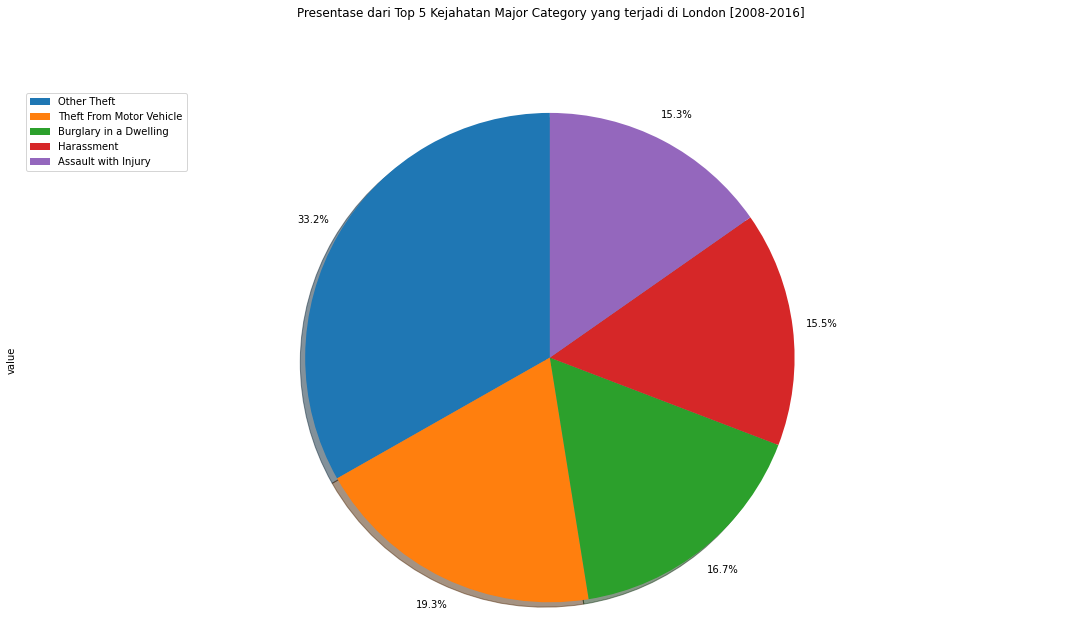

In [22]:
# mengelompokkan data berdasarkan minor_category dan menjumlahkan nilai kolom 'value'
minor_cat = df.groupby('minor_category')['value'].sum()

# mengambil 5 data teratas minor_category dari yang terbesar ke terkecil
minor_cat = minor_cat.sort_values(ascending=False)[:5]

# membuat visualisasi pie chart
minor_cat.plot(kind='pie',
                    figsize = (19,10),
                    autopct= '%1.1f%%',
                    startangle=90,
                    shadow=True,
                    labels=None,
                    pctdistance= 1.12,
                    )
plt.title("Presentase dari Top 5 Kejahatan Major Category yang terjadi di London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=minor_cat.index, loc='upper left')
plt.show()

<h2>Analisis</h2>

Dari visualisasi diatas, dapat dilihat bahwa persentase jumlah kejahatan minor_category tertinggi adalah Other Theft dengan persentase 33.2%, Theft From Motor Vehicle dengan persentase 19.3%, Burglary in a Dwelling 16.7%, Harassement 15.5% dan Assault with Injury 15.3%

<h1>Box Plot</h1>

Apa borough yang memiliki variabilitas tertinggi dalam jumlah laporan kejahatan?

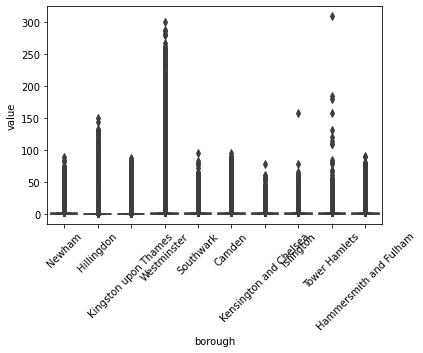

In [23]:
# Buat subset dataframe yang hanya mengandung variabel borough dan value
df_borough = df[['borough', 'value']]

# Hitung variance dari setiap borough
variances = df_borough.groupby(['borough']).var()['value'].sort_values(ascending=False)

# Ambil 10 borough dengan variance tertinggi
top10_variances = variances[:10].index.tolist()

# Buat box plot untuk 10 borough dengan variance tertinggi
sns.boxplot(x='borough', y='value', data=df_borough[df_borough['borough'].isin(top10_variances)])
plt.xticks(rotation=45)
plt.show()

<h2>Analisis</h2>

Dari data diatas bisa dilihat 10 borough teratas memiliki variansi tinggi yang mana menandakan adanya ketidak sesuaian data atau banyak perbedaan dalam data. oleh karena itu, perlu dilakukan penyesuaian kembali agar data tersebut dapat berkurang variansinya dan meningkatkan keakuratan hasil analisis.

<h1>Scatter Plot</h1>

Bagaimana hubungan antara jumlah laporan kejahatan dengan tahun yang dilaporkan?

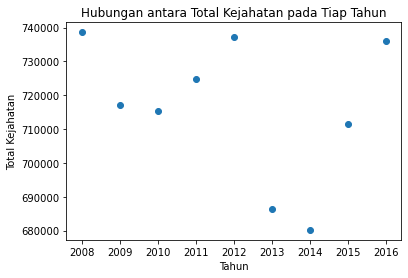

In [24]:
# mengelompokkan data berdasarkan tahun
df_by_year = df.groupby('year')['value'].sum().reset_index()

# membuat scatter plot
plt.scatter(x=df_by_year['year'], y=df_by_year['value'])

# buat visualisasinya
plt.xlabel('Tahun')
plt.ylabel('Total Kejahatan')
plt.title('Hubungan antara Total Kejahatan pada Tiap Tahun')
plt.show()

<h2>Analisis</h2>

Dari hasil visualisasi di atas menunjukkan bahwa tren penurunan terjadi dari tahun 2008 hingga 2013 sampai pada tahun berikutnya mengalami peningkatan hingga tahun 2016.

<h1>Word Clouds</h1>

Bagaimana perbandingan frekuensi laporan kejahatan antara major dan minor category yang berbeda dalam data tersebut?

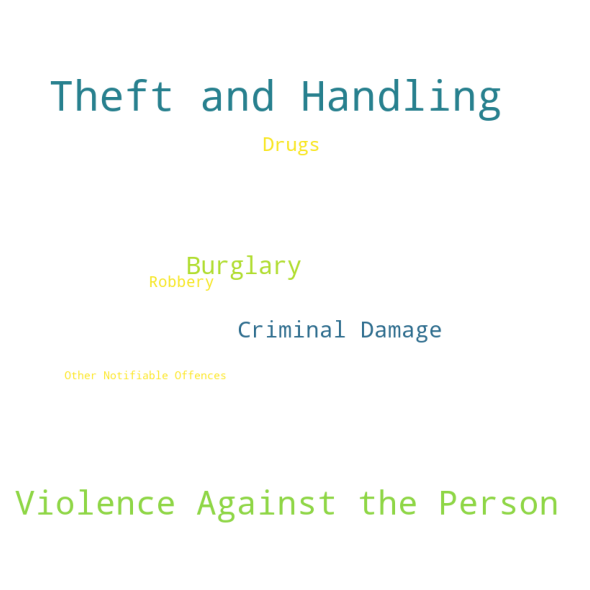

In [25]:
# mengelompokkan data berdasarkan minor category dan menghitung frekuensi
minor_category_count = df.groupby('major_category')['value'].sum()

# mengubah data menjadi dictionary
minor_category_dict = minor_category_count.to_dict()

# membuat word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(minor_category_dict)

# menampilkan word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h2>Analisis</h2>

Hasil dari visualisasi di atas menunjukkan bahwa Theft and Handling tercetak denga fontsize yang lebih besar dari yang lain sehingga dapat disimpulkan bahwa kejahatan tersebut merupakan kejahatan yang banyak terjadi di kota London

<h1>Folium Maps</h1>

Bagaimana persebaran kejahatan di London pada tahun 2008-2016?

In [26]:
# mengelompokkan data berdasarkan borough dan tahun
df_gb = df.groupby(['borough', 'year'], as_index=False).sum()

# membuat peta london
map_london = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# menambahkan layer choropleth ke peta
folium.Choropleth(
    geo_data='/Users/agilh/Downloads/london_boroughs.json',
    name='choropleth',
    data=df_gb,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.6,
    line_opacity=1,
    legend_name='Total Laporan Kejahatan'
).add_to(map_london)
folium.LayerControl().add_to(map_london)
map_london

<h2>Analisis</h2>

Dari hasil visualisasi diatas maka dapat dikatakan bahwa borough City of Westminster menjadi borough dengan aktifitas kejahatan terbanyak diikuti Brixton.

<h1>Overall Anasysis</h1>

1. *Theft and Handling* menjadi kasus kejahatan major_category terbanyak berdasarkan visualisasi word clouds dan untuk kejahatan minor_category, *Other Theft* menjadi kasus terbanyaknya berdasarkan visualisasi pie chart.
2. *Violence Againts the Person* pada major_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data area plot dan *Other Theft* pada minor_category memiliki frekuensi tertinggi pada pelaporan kejahatan berdasarkan data bar chart.
3. Tren penurunan kejahatan terjadi dari tahun 2008 hingga 2013 dan pada tahun berikutnya mengalami peningkatan hingga tahun 2016.
4. Frekuensi kejahatan major_category yang muncul tiap bulan dalam tiap tahun sedikit demi sedikit mengalami penurunan yang berkelanjutan kecuali untuk kejahatan major_kategory *Violence Against the Person* yang mengalami pasang surut degan kenaikkan di tahun 2012 kemudian turun lalu naik kembali di tahun 2014 secara konstan ke tahun berikutnya dan juga kejahatan major_kategory *Theft and Handling* yang naik di tahun yang sama 2012 walaupun pada tahun berikutnya dia mengalami penurunan yang konstan.
5. Hasil visualisasi box plot memperlihatkan bahwa adanya ketidak sesuaian data karena banyaknya variasi sehingga perlu proses lebih lanjut untuk mengatasi dataset yang ada.
6. City of Westminster menjadi borough dengan aktifitas kejahatan terbanyak.